# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [106]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# Import your own code
import inauguralproject

from scipy import optimize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

In [107]:
from inauguralproject import ExchangeEconomyClass

**Explain how you solve the model**

In [108]:
# code for solving the model (remember documentation and comments)
#import module
economy = inauguralproject.ExchangeEconomyClass()

#set parameters as in the py-file
par = economy.par

#determine utility of initial endowment
# a. consumer A
utility_init_A = economy.utility_A(economy.par.w1A, economy.par.w2A) #calling utility function in py-file
print(f"The utility of the bundle (x1A = {par.w1A}, x2A = {par.w2A}) is: {utility_init_A:.3f}")

# b. consumer B
utility_init_B = economy.utility_B(economy.par.w1B,economy.par.w2B) #calling utility function in py-file
print(f"The utility of the bundle (x1B = {par.w1B:.1f}, x2B = {par.w2B}) is: {utility_init_B:.3f}")

#create grid for x1a and x2a
N = 75
x1A_val = np.linspace(0,1,N)
x2A_val = np.linspace(0,1,N)

#create set C
C = []

#loop through grid and append pareto values to C
for x1A in x1A_val:
    for x2A in x2A_val:
        # a. calculate the corresponding consume for B that follows from walras' law:
        x1B = 1-x1A
        x2B = 1-x2A
        # b. calculate utility at every point
        utility_A=economy.utility_A(x1A,x2A)
        utility_B=economy.utility_B(x1B,x2B)
        # c. check if value is pareto
        if utility_A >= utility_init_A and utility_B >= utility_init_B:
            # d. append to C if condition is satisfied
            C.append((x1A,x2A))

#mske kan man lave en nemmere løsning end at loope gennem grid af værdier?

The utility of the bundle (x1A = 0.8, x2A = 0.3) is: 0.416
The utility of the bundle (x1B = 0.2, x2B = 0.7) is: 0.304


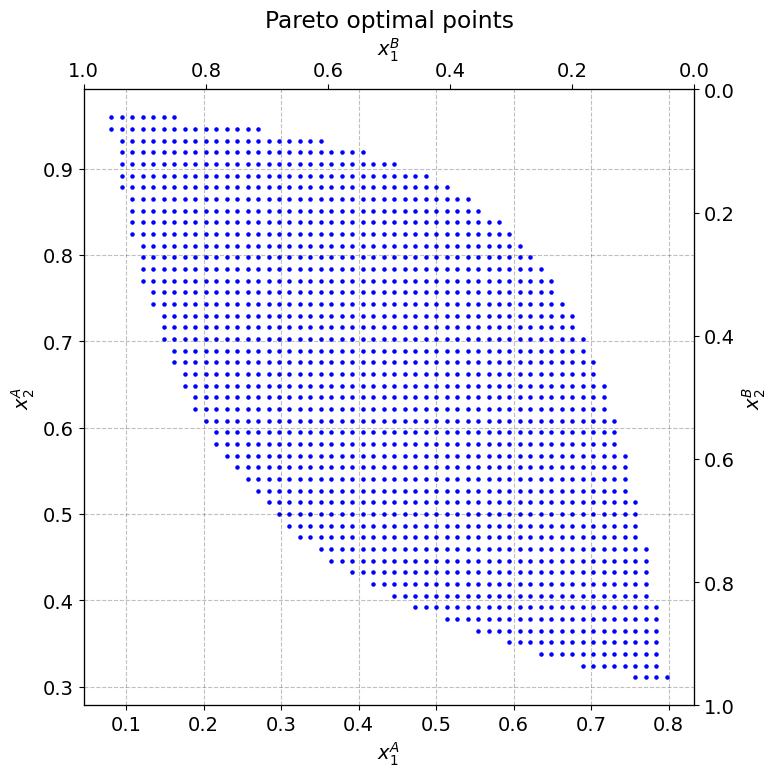

In [109]:
#plot edgeworth box
C = np.array(C)
fig, ax1 = plt.subplots(figsize=(8, 8), dpi=100)

# a. plot the points for agent A
ax1.scatter(C[:, 0], C[:, 1], s=5, color='blue') 
ax1.set_xlabel('$x^A_1$')
ax1.set_ylabel('$x^A_2$')
# b. create axes for agent B
ax2 = ax1.twinx() 
ax3 = ax1.twiny()  
ax2.set_ylabel('$x^B_2$')
ax3.set_xlabel('$x^B_1$')
ax3.invert_xaxis()
ax2.invert_yaxis()
# c. create title
plt.title('Pareto optimal points')
# d. enable grid for primary axes 
ax1.grid(True)
# e. disable grid for secondary axes
ax2.grid(False)
ax3.grid(False)
plt.tight_layout()
plt.show()

#få grid til at være aligned og pænt
#evt. tilføje indifferenskurver... hvordan?
#måske også få denne ind i py-filen

# Question 2

Explain your code and procedure

In [110]:

# Define the price set with an increment of 1/2N
P1 = np.arange(0.5, 2.5 + (1/(N)*2), 1/(N)*2)
#print(P1)

#loop over prices in price set
for p1 in P1:
    # a. call the market clearing in the py-file
    epsilon_1, epsilon_2 = economy.check_market_clearing(p1)

print(f'eps1 = {epsilon_1:.3f}, eps2 = {epsilon_2: .3f}')    

eps1 = 0.027, eps2 =  0.933


# Question 3

Explain your code and procedure

ADD CONCISE CONLUSION.